In [17]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('/home/jp4474/latent-abc-smc')
from systems import MZB

In [3]:
observational_data = np.load("/home/jp4474/latent-abc-smc/data/mzb_data.npz")

In [4]:
mzb_abc = MZB(observational_data = observational_data['obs_data'])

INFO:latent_abc_smc:Initializing LatentABCSMC class
INFO:latent_abc_smc:Initialization complete
INFO:latent_abc_smc:LatentABCSMC class initialized with the following parameters:
INFO:latent_abc_smc:num_parameters: 6
INFO:latent_abc_smc:lower_bounds: [ 0.  10.  -0.2 -7.4  1.9 -6.4]
INFO:latent_abc_smc:upper_bounds: [ 1.  18.   0.4 -2.6  5.1 -1.6]
INFO:latent_abc_smc:t0: 40
INFO:latent_abc_smc:tmax: 732
INFO:latent_abc_smc:time_space: [ 59  69  76  88  95 102 108 109 113 119 122 124 141 156 158 183 212 217
 219 235 261 270 289 291 306 442 524 563 566 731]
INFO:latent_abc_smc:pooling_method: cls
INFO:latent_abc_smc:metric: cosine


In [45]:
particles = np.load('/home/jp4474/latent-abc-smc/mzb_abc.npz')['particles']

In [46]:
last_particle = particles[-1]

In [47]:
last_particle.mean(0)

array([ 0.24991564, 17.49748033,  0.08248811, -4.24377389,  3.81510781,
       -3.77841568])

In [48]:
df_np = []
for params in last_particle:
    simulations, _ = mzb_abc.simulate(params)
    scales = np.mean(np.abs(simulations), axis=0)
    df_np.append(np.concatenate((params, scales)))

In [49]:
df = pd.DataFrame(df_np)

In [50]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.664199,18.166168,-0.019516,-4.016423,3.969023,-4.407426,1.124946e+09,0.152065,0.127500,0.447141
1,0.071491,17.059712,0.060355,-4.106558,3.849656,-3.627199,1.327317e+07,0.163611,0.122143,0.509142
2,0.446934,17.486967,0.714661,-4.747860,4.357067,-3.826823,3.841044e+07,0.140605,0.098535,0.755106
3,0.118051,17.796507,0.136163,-4.162570,4.127776,-3.982970,4.957098e+07,0.154681,0.116575,0.343143
4,0.330038,17.743065,-0.132114,-4.697648,4.914323,-3.338438,1.794103e+07,0.195314,0.139694,0.772893
...,...,...,...,...,...,...,...,...,...,...
995,0.172488,17.135081,0.216699,-4.352307,4.326130,-3.768106,2.151404e+07,0.159201,0.116307,0.639762
996,0.462169,17.669277,0.181255,-3.643714,3.052587,-3.269347,4.448044e+07,0.178916,0.152430,0.724602
997,0.316141,17.782956,0.087805,-4.649071,4.326561,-4.250327,6.394757e+07,0.126160,0.084780,0.558429
998,0.115835,17.394336,0.034899,-4.222848,3.462032,-4.007325,3.621244e+07,0.128863,0.095605,0.422039


In [51]:
def distance(x, y):
    return np.mean(x-y)

df['distance'] = df.apply(lambda x: distance(x[6:], observational_data['obs_scale']), axis=1)

In [52]:
df = df.sort_values('distance')

In [53]:
observational_data['obs_scale']

array(2859321.57640152)

In [54]:
# extract the first 6 columns
plot_df = df.iloc[:, :6].head(300)

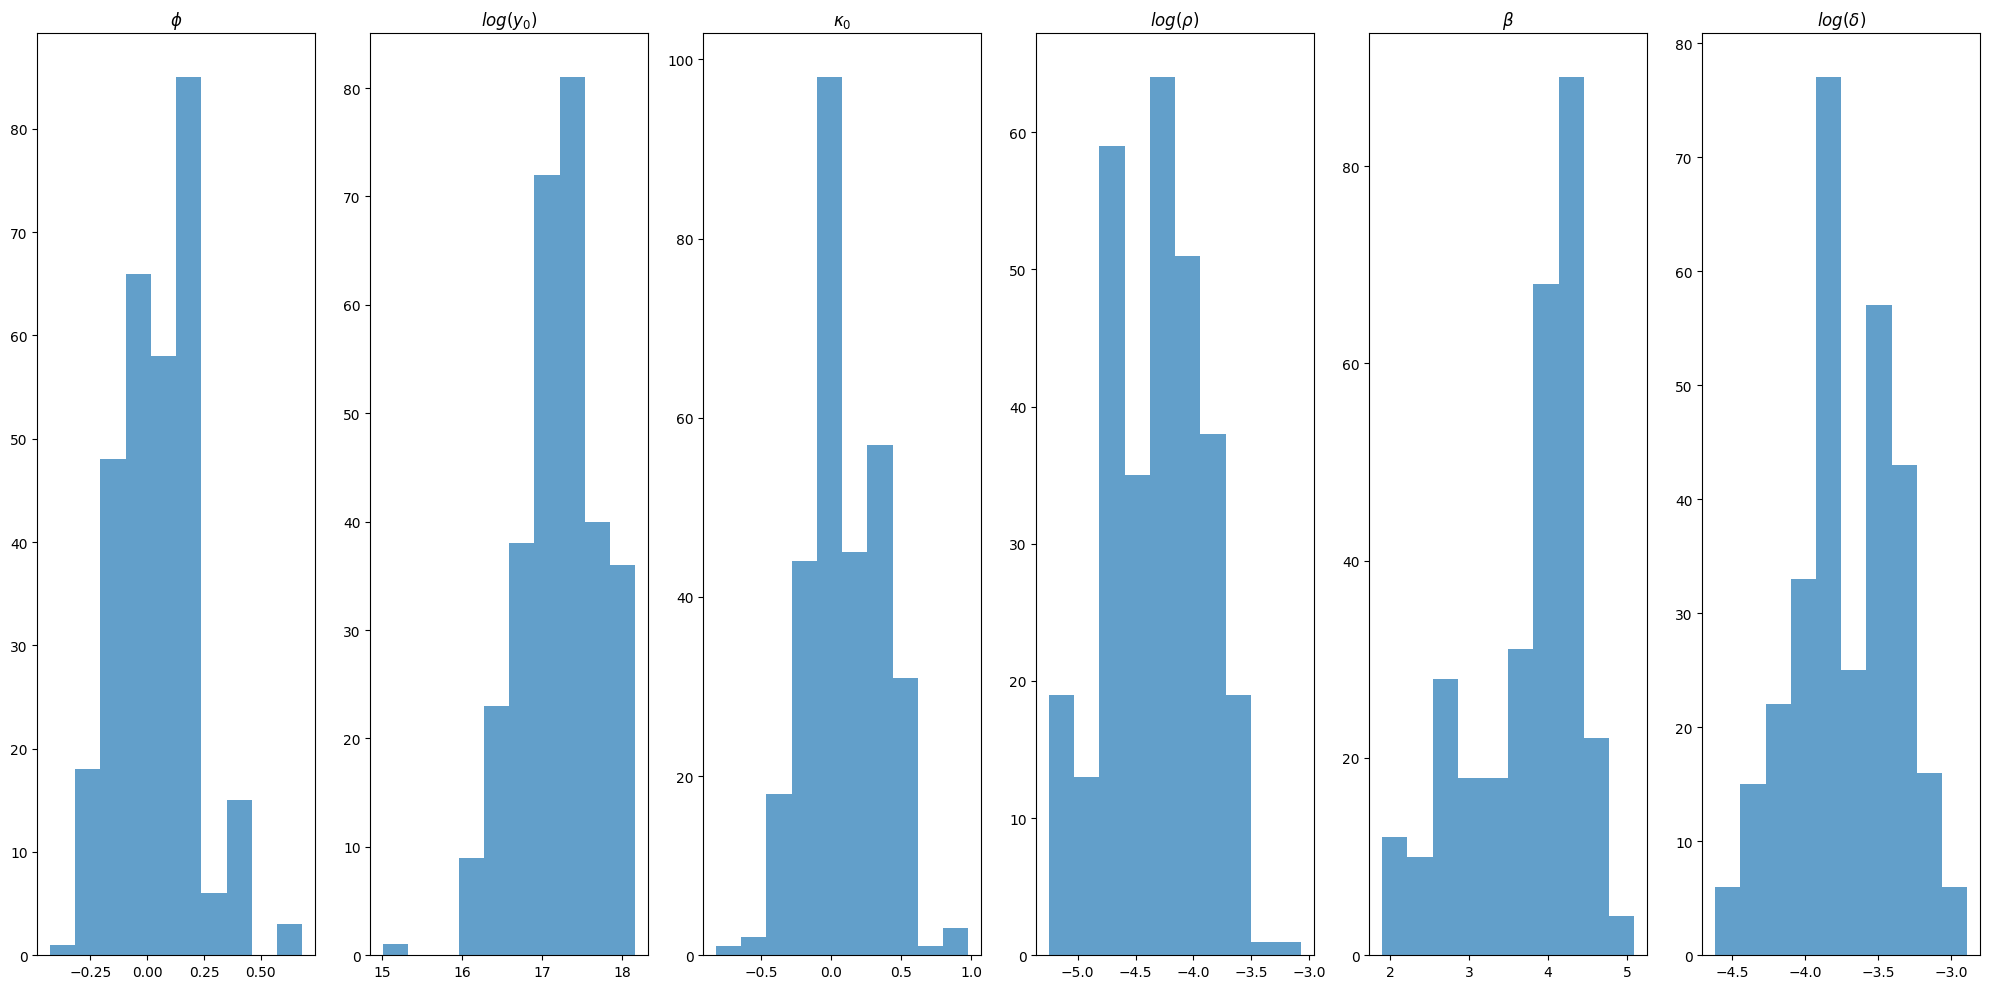

In [55]:
# Save each subplot as a separate image (e.g., PNG or GIF)
fig, ax = plt.subplots(1, 6, figsize=(20, 10))

# Plot histograms for Beta and Alpha
ax[0].hist(plot_df.iloc[:,0].values, bins=10, alpha=0.7, label="Posterior")
ax[1].hist(plot_df.iloc[:,1].values, bins=10, alpha=0.7, label="Posterior")
ax[2].hist(plot_df.iloc[:,2].values, bins=10, alpha=0.7, label="Posterior")
ax[3].hist(plot_df.iloc[:,3].values, bins=10, alpha=0.7, label="Posterior")
ax[4].hist(plot_df.iloc[:,4].values, bins=10, alpha=0.7, label="Posterior")
ax[5].hist(plot_df.iloc[:,5].values, bins=10, alpha=0.7, label="Posterior")

# phi, y0_Log, kappa_0, rho_Log, beta, delta_Log
ax[0].set_title(r'$\phi$')
ax[1].set_title(r'$log (y_0)$')
ax[2].set_title(r'$\kappa_0$')
ax[3].set_title(r'$log(\rho)$')
ax[4].set_title(r'$\beta$')
ax[5].set_title(r'$log(\delta)$')

# Adjust layout to prevent overlap
plt.tight_layout()

# If you want to display the plots, you can do so before saving and closing them
plt.show()

In [56]:
df

,0,1,2,3,4,5,6,7,8,9,distance
192,-0.006245,15.010356,-0.520941,-5.180605,4.122608,-4.368551,1.075757e+06,0.000000,0.032071,1.688241,-2.590382e+06
190,0.106762,16.388641,0.015908,-4.480080,4.821535,-3.032325,3.878172e+06,0.233107,0.182341,0.842339,-1.889778e+06
53,-0.114715,16.902976,-0.247371,-4.259103,4.437431,-3.294438,4.317802e+06,0.000000,0.036821,5.046174,-1.779870e+06
73,-0.114715,16.902976,-0.247371,-4.259103,4.437431,-3.294438,4.317802e+06,0.000000,0.036821,5.046174,-1.779870e+06
101,0.044230,17.756415,0.555764,-4.111909,2.601992,-2.938081,4.643797e+06,0.159020,0.113941,0.623446,-1.698372e+06
...,...,...,...,...,...,...,...,...,...,...,...
683,0.001188,15.425249,-0.335080,-3.321779,2.589244,-3.936136,1.858017e+10,0.168906,0.157458,0.012812,4.642184e+09
395,0.424859,18.081658,-0.146650,-3.507243,3.614821,-4.034243,2.488509e+10,0.195601,0.178932,0.281684,6.218413e+09
36,0.544812,17.388631,-0.139900,-3.004312,3.265712,-3.476870,1.017203e+12,0.255569,0.245644,0.426656,2.542980e+11
159,0.335604,17.556734,0.627800,-2.773758,2.618610,-3.507880,1.001202e+16,0.252435,0.246655,0.200913,2.503005e+15


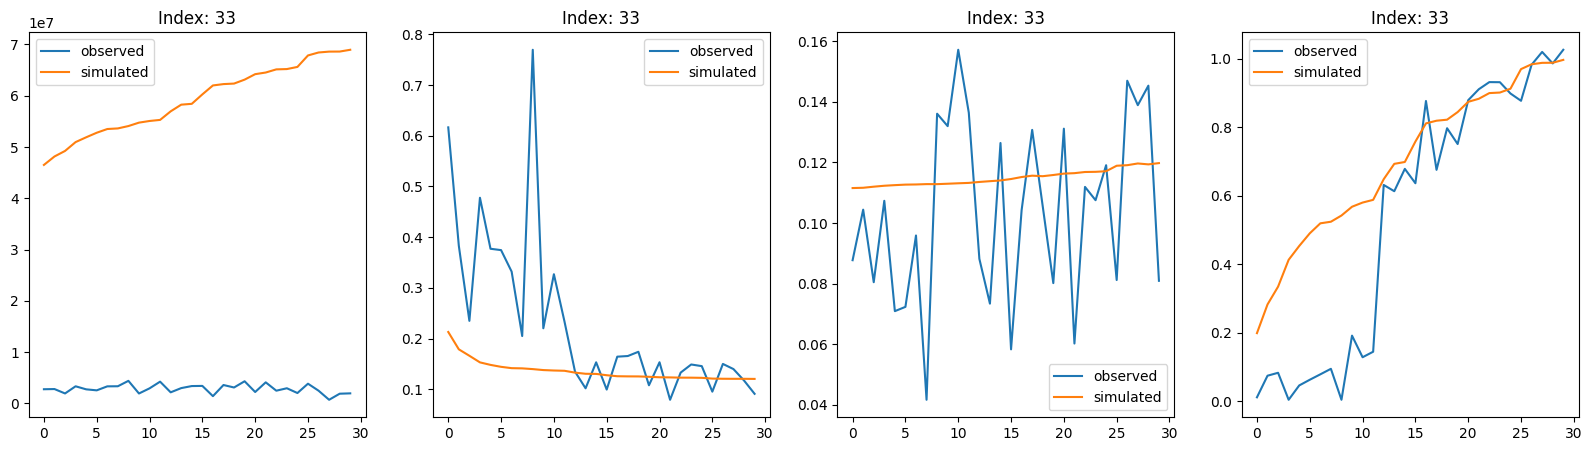

Button(description='Next', style=ButtonStyle())

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Assuming plot_df is a DataFrame with parameters and observational_data is defined
# plot_df = ...
# observational_data = ...

# Create an iterator for the parameters along with their indices
params_iter = enumerate(df.sample(frac=1).iloc[:, :6].values)

data = observational_data['obs_data']
# Function to update the plot with the next set of parameters
def update_plot(_):
    try:
        # Clear the previous output (including the previous plot)
        clear_output(wait=True)
        
        # Get the next set of parameters and their index
        index, params = next(params_iter)
        simulations, _ = mzb_abc.simulate(params)

        # Create a new plot
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))

        for i in range(4):
            ax[i].plot(data[:, i], label='observed')
            ax[i].plot(simulations[:, i], label='simulated')
            ax[i].set_title(f'Index: {index}')  # Print the index instead of parameters
            ax[i].legend()

        plt.show()
    except StopIteration:
        print("All parameter sets have been iterated.")
    
    # Re-display the button after updating the plot
    display(next_button)

# Create a "Next" button
next_button = widgets.Button(description="Next")
next_button.on_click(update_plot)

# Display the button initially
display(next_button)

# Initial plot (optional)
update_plot(None)

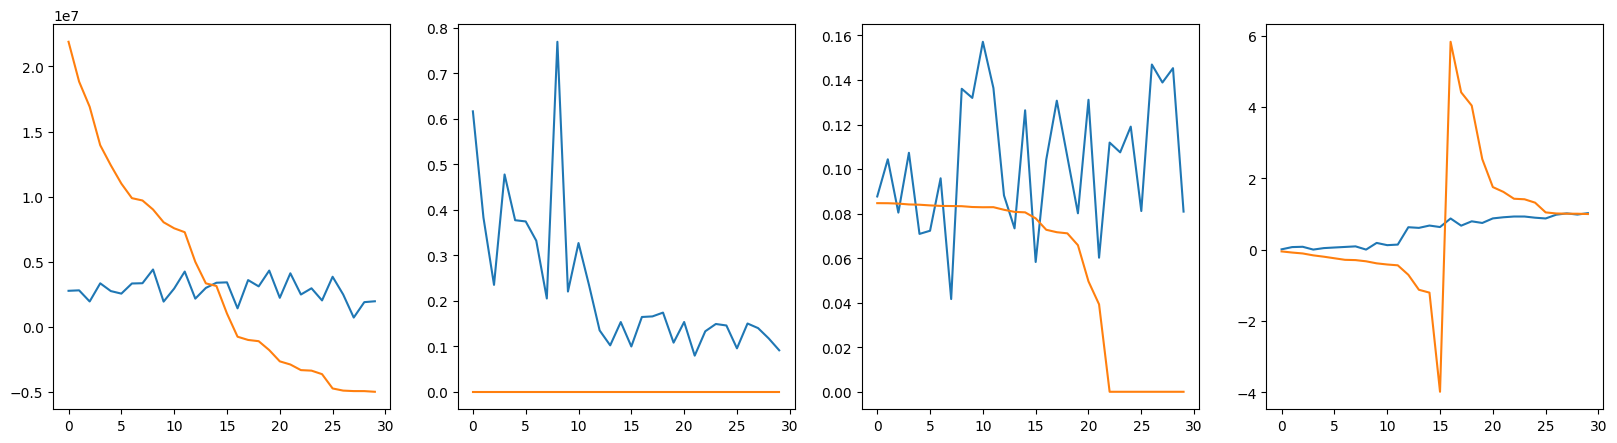

In [58]:
from matplotlib import pyplot as plt

simulations, _ = mzb_abc.simulate(df.head(100).mean(0)[:6])

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    ax[i].plot(observational_data['obs_data'][:, i], label='observed')
    ax[i].plot(simulations[:, i], label='simulated')

(array([998.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-2.59038199e+06,  1.25150272e+14,  2.50300547e+14,  3.75450822e+14,
         5.00601097e+14,  6.25751371e+14,  7.50901646e+14,  8.76051921e+14,
         1.00120220e+15,  1.12635247e+15,  1.25150275e+15,  1.37665302e+15,
         1.50180329e+15,  1.62695357e+15,  1.75210384e+15,  1.87725412e+15,
         2.00240439e+15,  2.12755467e+15,  2.25270494e+15,  2.37785522e+15,
         2.50300549e+15]),
 <BarContainer object of 20 artists>)

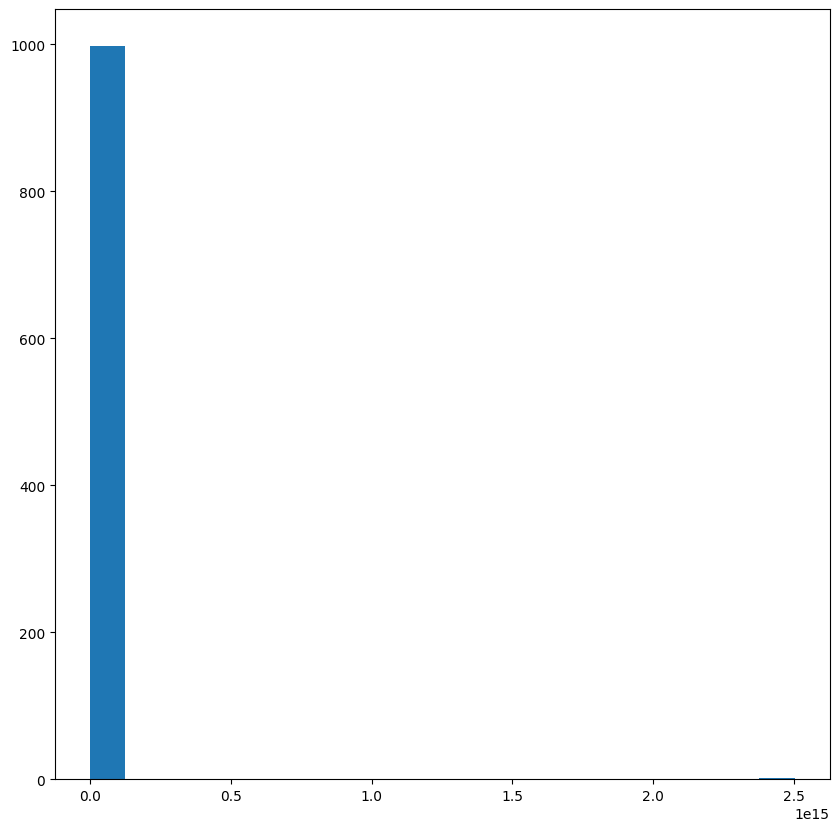

In [59]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.hist(df['distance'], bins=20)